Welcome to the <span style="color:blue">mudseries</span> IPython Notebook 
-------------------------------

Please define the following inputs in the box below:

| Variable      | Description         | 
| :------------- |:---------------------|
| **<span style="color:red">inputdir</span>** | Input directory where the images can be found [.jpg/.JPG]  |
| **<span style="color:blue">inputdir/mudseries_config.txt</span>** | configuration file for the the mudseries.py script [explanation below] |
| **<span style="color:blue">inputdir/mask_white.jpg</span>** | Path to the mask file [a.k.a mask_white.jpg] |
| **<span style="color:blue">inputdir/preprocessing</span>** | Output directory [folders plot, results and kmeans will be created here] |

**NOTES**:
- The mask file **<span style="color:green">mask_white.jpg</span>** must be inside the **<span style="color:red">inputdir</span>** folder
- The configuration file **<span style="color:green">mudseries_config.txt</span>** must be inside the **<span style="color:red">inputdir</span>** has for example the following format:

```
# Basic configurations, write images 1 picture with level estimation per column/image inside the kmeans output folder
[previews]
writeimg = False

# After applying mask_white.jpg - cutting columns by margin to reduce errors. Do not put zeros and no . (floats)!
[cropping]
margin_top_px = 1
margin_bottom_px = 1
margin_left_px = 90
margin_right_px = 90

# Kmeans color quantification options - number of clusters and sub-number of mud or dark clusters. Put as int!
[kmeans]
nbclusters = 4
mudclusters = 1

# Thresholds to detect mud block percentage of mud in the line
[levels]
dark_thr_percent = 70

# Filtering options
[filtering]
thr_blame = 2
thr_min_perc = 20
thr_max_perc = 80
blk_size = 10
```

**Algorithm**:
-	Get all the images in the **<span style="color:blue">inputdir</span>** directory.
-	For each image extract the exact date from the EXIF header (camera metadata information, other fields may be used, lot of info).
-	Filter out the objects/columns with **<span style="color:blue">mask_white.jpg</span>**. 
-	Colour quantization with K-Means (configurable number of clusters, default=8).
-	For each column extract mud-level parsing each raster line (configurable %dark_pixels and dark_pixel_value[0…255]

**Outputs** [inside the folder defined in **<span style="color:blue">idir/preprocessing</span>**]:
-	Folder with plots in html format
-	Folder with a csv containing the time-series (date/pixels). You can convert later on pixels to cm.
-	Folder with previews per column/date/level. Some of them are not ‘drawn’ but calculated. Bug drawing probably.


In [1]:
# Please fill this input values [explanation above]
import os, sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def setpaths(i):
    global idir
    r = os.getcwd()    
    idir = os.path.join(r, i)
    
# Interactive stdout
oldsysstdout = sys.stdout
class flushfile():
    def __init__(self, f):
        self.f = f
    def __getattr__(self,name): 
        return object.__getattribute__(self.f, name)
    def write(self, x):
        self.f.write(x)
        self.f.flush()
    def flush(self):
        self.f.flush()
sys.stdout = flushfile(sys.stdout)

In [2]:
interact(setpaths, i='D:\sala\Documents\mudseries\IMAGES\CHATTAM_IMAGES');

interactive(children=(Text(value=u'D:\\sala\\Documents\\mudseries\\IMAGES\\CHATTAM_IMAGES', description=u'i'), Output()), _dom_classes=('widget-interact',))

In [3]:
idir

u'D:\\sala\\Documents\\mudseries\\IMAGES\\CHATTAM_IMAGES'

In [4]:
# Import libs
from mudseries import Mudseries

# Launch mudseries [this may take a while]
m = Mudseries(idir)
errmsg = m.check_inputs()
if len(errmsg) == 0:
    m.prepare()
else:
    print('ERROR: ' + errmsg)

486 images found
Mask generation - volume detected x,y=(3061,337)- 211 x 1851
Mask generation - volume detected x,y=(2579,331)- 225 x 1889
Mask generation - volume detected x,y=(2103,320)- 233 x 1912
Mask generation - volume detected x,y=(1623,320)- 233 x 1924
Mask generation - volume detected x,y=(1142,320)- 242 x 1912
Mask generation - volume detected x,y=(643,320)- 225 x 1924
Log file available at: D:\sala\Documents\mudseries\IMAGES\CHATTAM_IMAGES\preprocess\mudseries_pre_processing.log


In [5]:
# Run pre-processing for all the images
if len(errmsg) == 0:
    m.run()    

0% -> 1 of 486.0 images processed
10% -> 49 of 486.0 images processed
20% -> 98 of 486.0 images processed
30% -> 146 of 486.0 images processed
40% -> 195 of 486.0 images processed
50% -> 243 of 486.0 images processed
60% -> 292 of 486.0 images processed
70% -> 341 of 486.0 images processed
80% -> 389 of 486.0 images processed
90% -> 438 of 486.0 images processed
100% -> 486 of 486.0 images processed


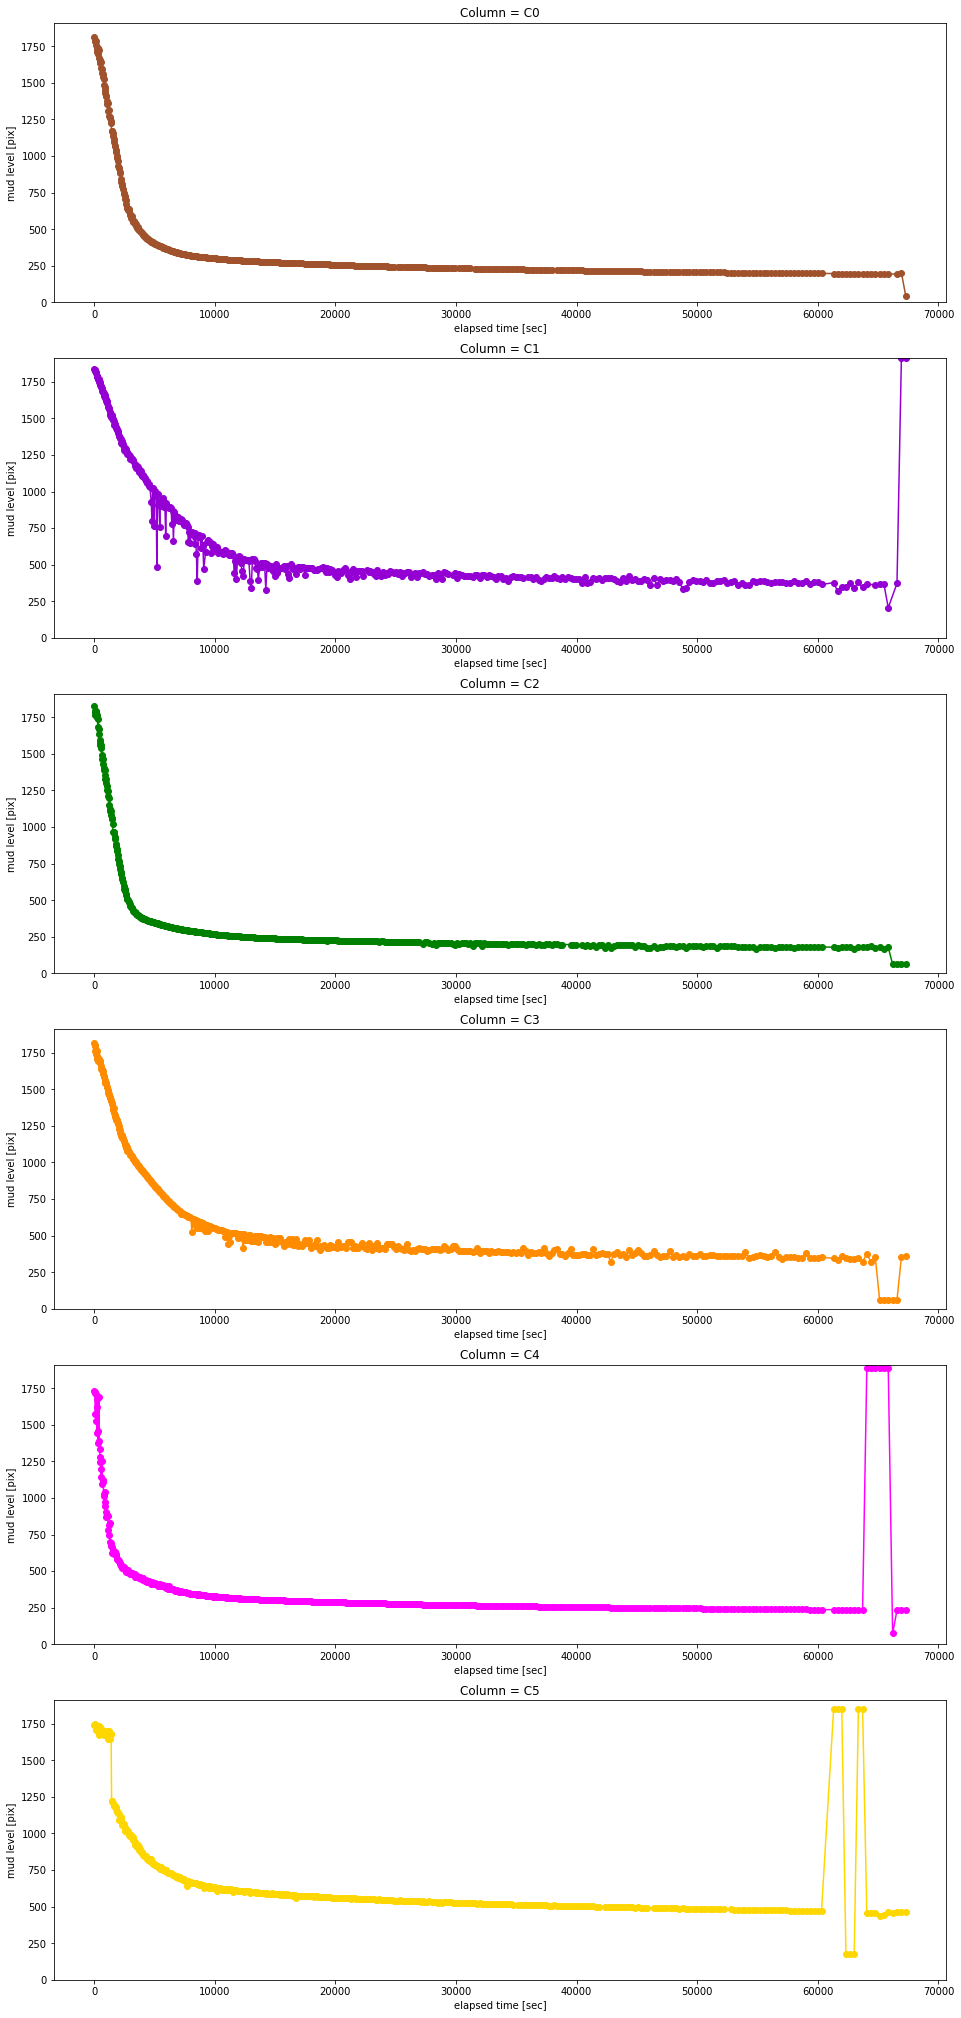

In [6]:
%matplotlib inline
if len(errmsg) == 0:
    m.preview_plots()